In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.utils.data import Dataset
from skimage import io, transform

In [2]:
train_data = pd.read_csv('data/train.csv')

In [3]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
n = 3
img_label = train_data.iloc[n, 0]
image = train_data.iloc[n, 1:].values
image = image.reshape(28, 28)
print(f'Image label: {img_label}')
print(f'Image shape: {image.shape}')
print(f'First four rows of pixel values: \n {image[:4]}')

Image label: 4
Image shape: (28, 28)
First four rows of pixel values: 
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


TypeError: Object does not appear to be a 8-bit string path or a Python file-like object

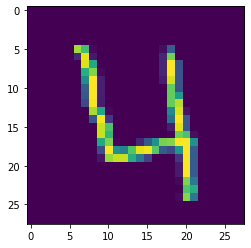

In [48]:
plt.figure()
plt.imshow(image)
plt.imread(image)

In [45]:
class DigitDataset(Dataset):
    
    def __init__(self, csv_file, transform=None):
        self.digits_frame = pd.read_csv(csv_file)
        self.transform = transform
        
    def __len__(self):
        return len(self.digits_frame)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx.to_list()
        label = self.digits_frame.iloc[idx, 0]
        image = self.digits_frame.iloc[idx, 1:].values
        image = image.reshape(28, 28)
        sample = {'label': label, 'image': image}
        
        if self.transform:
            sample = self.transform(sample)
        
        return sample

0 (28, 28) ()
1 (28, 28) ()
2 (28, 28) ()
3 (28, 28) ()


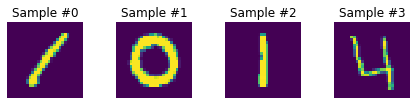

In [47]:
train_data = DigitDataset('data/train.csv')
fig = plt.figure()
for i in range(len(train_data)):
    sample = train_data[i]
    print(i, sample['image'].shape, sample['label'].shape)
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title(f"Sample #{i}")
    ax.axis('off')
    plt.imshow(sample['image'])
    if i == 3:
        plt.show()
        break